# Решающие деревья

#  I. Немного решающих деревьев
##### Задача 1. Построение "среднего" алгоритма
В этом задании вам нужно построить графики, демонстрирующие, как алгоритм аппроксимирует истинную зависимость в данных и как он меняется в зависимости от гиперпараметров метода обучения.

In [35]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np


In [36]:
def f(x):
    return np.sin(x)   # истинная зависимость в данных
sample_size = 100      # длина выборки
samples_num = 20       # количество выборок
linspace = np.linspace(0, 7, 1000)  # точки для построения графиков

__1. (2 балла)__
1. Сгенерируйте выборку $x$ из одномерного экспоненциального распределения (np.random.exponential) длины sample_size.
1. Создайте вектор целевых переменных $y$ как сумму $f(x)$ и случайного шума, сгенерированного из равномерного распределения на отрезке $[-1, 1]$ (np.random.uniform).
1. Обучите DecisionTreeRegressor с параметрами по умолчанию на полученной выборке и сделайте предсказания для объектов из linspace.
1. Постройте два графика на одном рисунке: $f(x)$ и зависимость, восстановленную решающим деревом.

    Рекомендация: не забудьте, что все методы обучения в sklearn требуют на вход двумерную матрицу объекты-признаки. Сделать такую из одномерного вектора можно добавлением мнимых осей (np.newaxis).

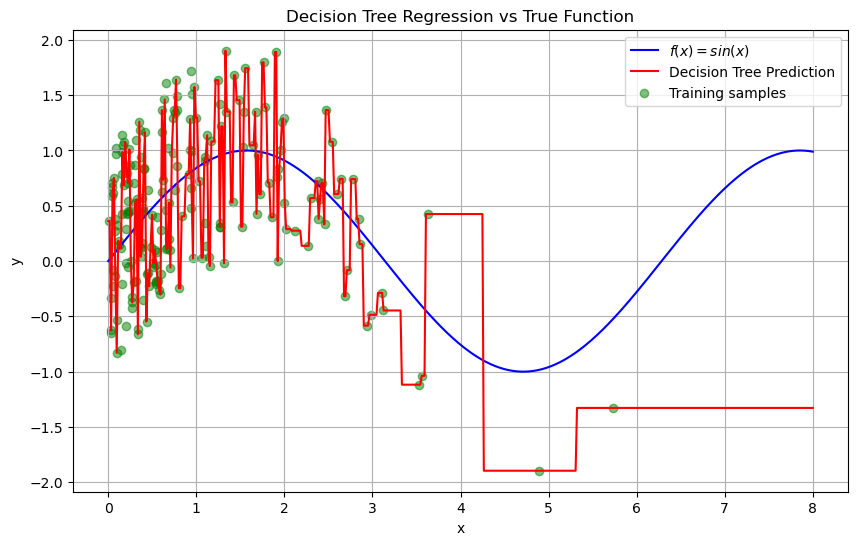

In [37]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np

num_points = 200
grid = np.linspace(0, 8, 500)

def original_func(values):
    return np.sin(values)

X_data = np.random.exponential(scale=1.0, size=num_points)
data_noise = np.random.uniform(-1, 1, size=num_points)
Y_data = original_func(X_data) + data_noise

tree_model = DecisionTreeRegressor()
tree_model.fit(X_data.reshape(-1, 1), Y_data)

predicted_values = tree_model.predict(grid.reshape(-1, 1))

plt.figure(figsize=(10, 6))

plt.plot(grid, original_func(grid), label='$f(x) = sin(x)$', color='blue')
plt.plot(grid, predicted_values, label='Decision Tree Prediction', color='red')

plt.scatter(X_data, Y_data, color='green', alpha=0.5, label='Training samples')

plt.title('Decision Tree Regression vs True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.show()

__2. (1 балл)__

Повторите первые 3 шага, описанные выше, samples_num раз. На одном графике для каждого обученного решающего дерева визуализируйте восстановленную им зависимость (рекомендуется все такие линии рисовать полупрозрачными и серым цветом: plt.plot(...... color="gray", alpha=0.5)).  На этом же графике изобразите истинную зависимость f(x) (красным цветом: color="red") и усредненную по всем деревьям восстановленную зависимость (черным цветом: color="black").    

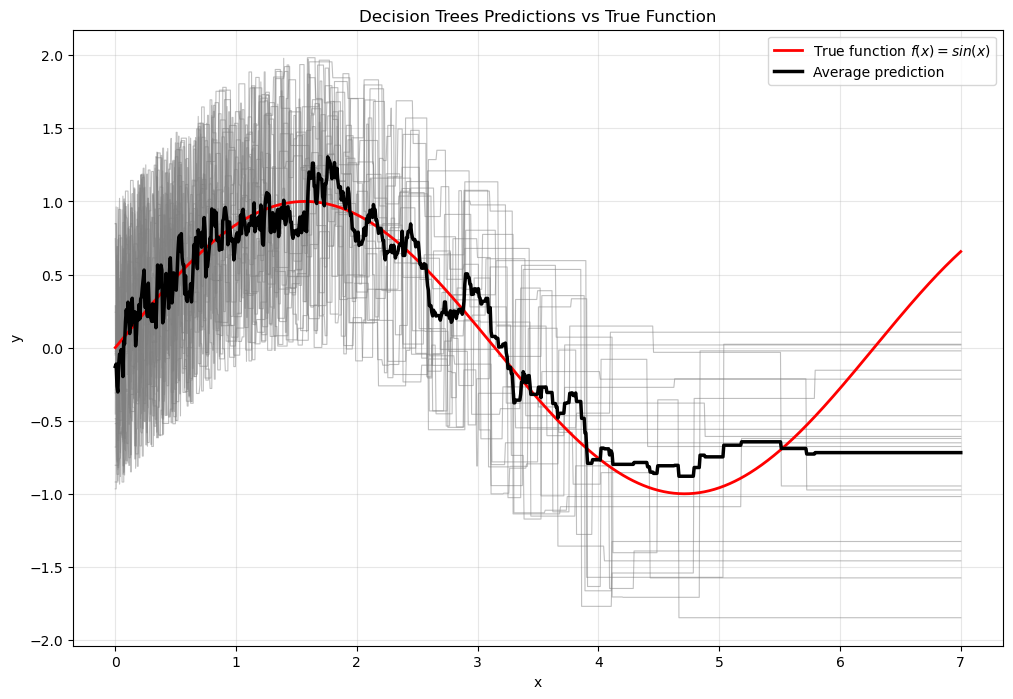

In [38]:
def depth(param):
    all_predictions = []

    plt.figure(figsize=(12, 8))

    for iteration in range(samples_num):
        X_vals = np.random.exponential(scale=1.0, size=sample_size)
        
        random_eps = np.random.uniform(-1, 1, size=sample_size)
        Y_vals = f(X_vals) + random_eps

        dt_model = DecisionTreeRegressor(max_depth=param)
        dt_model.fit(X_vals.reshape(-1, 1), Y_vals)

        model_output = dt_model.predict(linspace.reshape(-1, 1))
        all_predictions.append(model_output)

        plt.plot(linspace, model_output, color="gray", alpha=0.5, linewidth=0.8)

    plt.plot(linspace, f(linspace), color="red", linewidth=2, 
             label='True function $f(x) = sin(x)$')

    avg_prediction = np.mean(all_predictions, axis=0)
    plt.plot(linspace, avg_prediction, color="black", linewidth=2.5, 
             label='Average prediction')

    plt.title('Decision Trees Predictions vs True Function')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

depth(None)

__3.(0.5 балл):__
Повторите предыдущий пункт, установив максимальную глубину решающего дерева равной 2, а затем равной 4. Таким образом, у вас получится еще два графика.

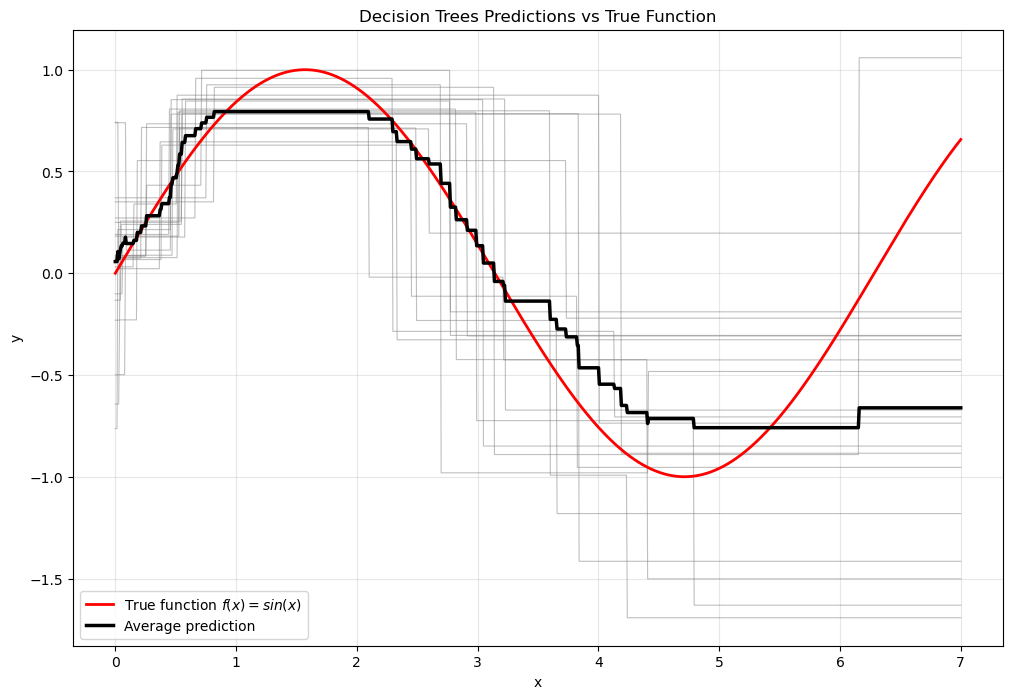

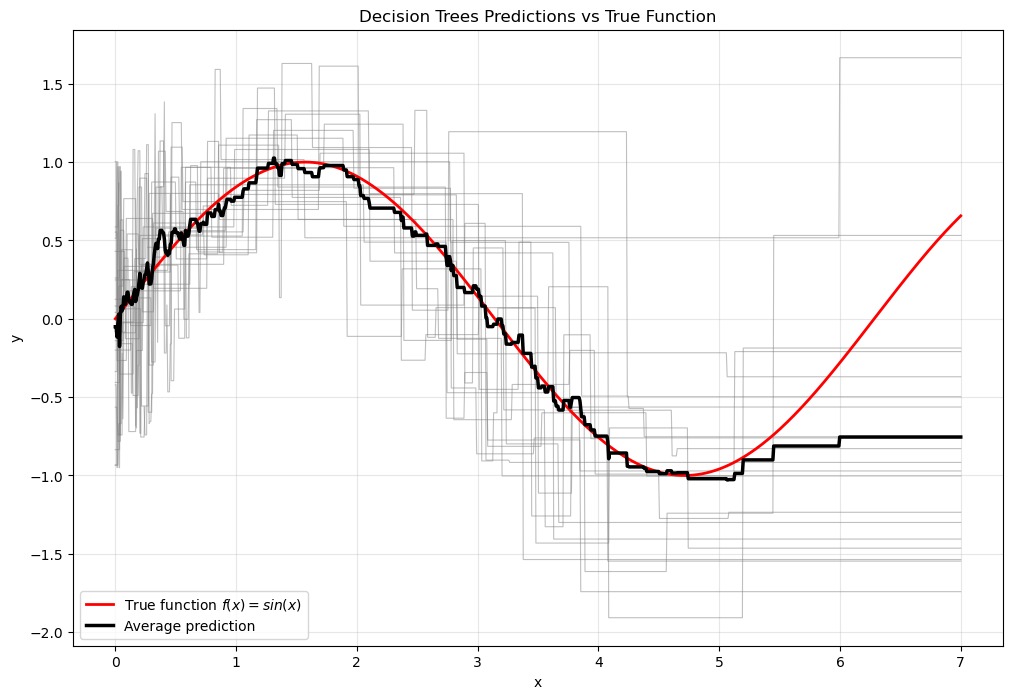

In [39]:
depth(2)
depth(4)

__4. (0.5 балла)__ Что можно сказать о смещении решающих деревьев, исходя из проведенного эксперимента? В каких из трех рассмотренных случаев (без ограничения на глубину дерева и с ограничением 2 и 4) можно утверждать, что смещение решающего дерева близко к нулю?

**Ответ:**
**Минимальное смещение** наблюдается у **неограниченных по глубине** деревьев, поскольку они обладают максимальной гибкостью и способны практически точно воспроизводить обучающие данные.
При глубине 2 или 4 смещение значительно выше из-за недостаточной гибкости модели - слишком жесткая

### II. Решающие деревья чужими руками

#### Задача 3.
В этой части вам нужно посмотреть на класс написанный за вас для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__8. (1 балл)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [40]:
import pandas as pd

df = pd.read_csv('students.csv')
print(df.head())

    STG   SCG   STR   LPR   PEG   UNS
0  0.00  0.00  0.00  0.00  0.00     0
1  0.08  0.08  0.10  0.24  0.90     1
2  0.06  0.06  0.05  0.25  0.33     0
3  0.10  0.10  0.15  0.65  0.30     1
4  0.08  0.08  0.08  0.98  0.24     0


In [41]:
import importlib
from matplotlib import pyplot as plt
import hw3code as hw

importlib.reload(hw)

<module 'hw3code' from 'c:\\Users\\Егор\\Documents\\прог\\ml\\task7_dstree_practice\\hw3code.py'>

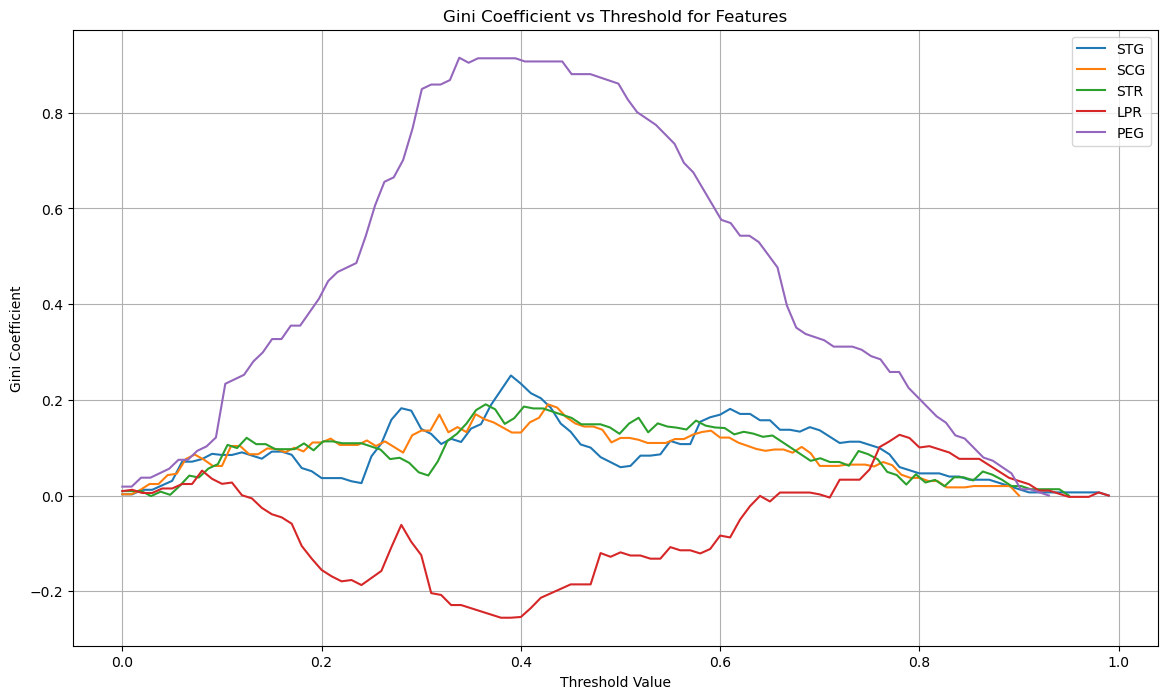

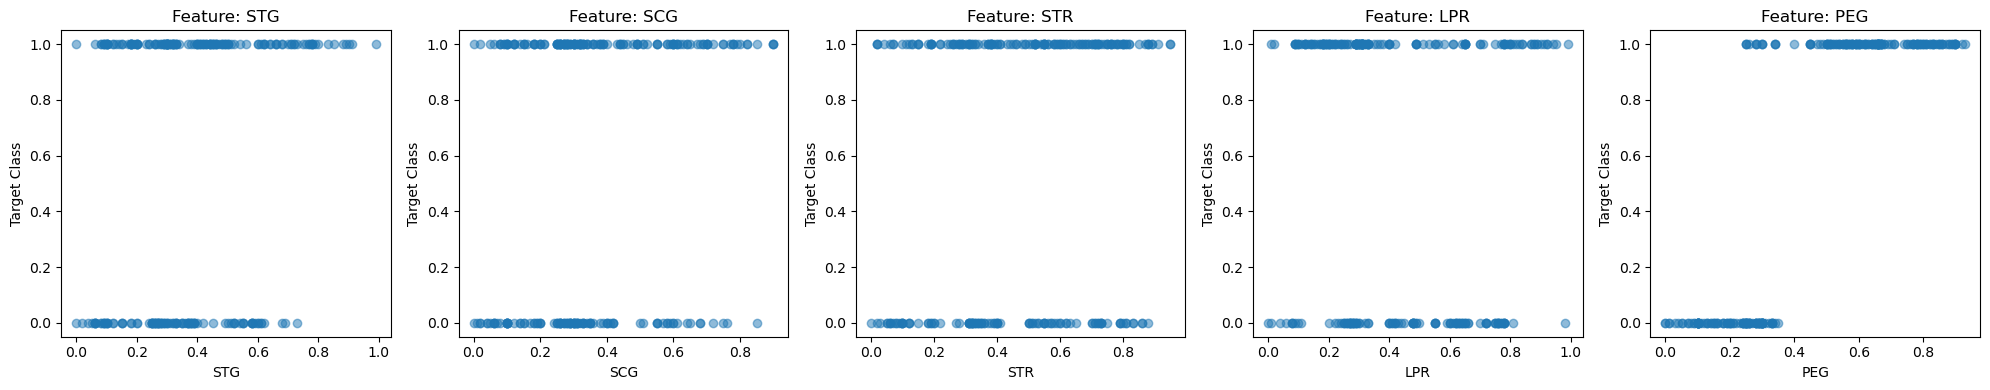

In [42]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

from sklearn.metrics import roc_auc_score

def calc_gini_threshold(feature_values, threshold_value, target):
    predictions = (feature_values > threshold_value).astype(int)
    auc_score = roc_auc_score(target, predictions)
    gini_value = 2 * auc_score - 1
    return gini_value

plt.figure(figsize=(14, 8))

for feature_col in X.columns:
    threshold_range = np.linspace(X[feature_col].min(), X[feature_col].max(), 100)
    gini_vals = [calc_gini_threshold(X[feature_col], t, y) for t in threshold_range]
    plt.plot(threshold_range, gini_vals, label=feature_col)

plt.xlabel('Threshold Value')
plt.ylabel('Gini Coefficient')
plt.title('Gini Coefficient vs Threshold for Features')
plt.legend()
plt.grid(True)
plt.show()

fig, axs = plt.subplots(1, 5, figsize=(20, 4))

for idx, feature_name in enumerate(X.columns):
    axs[idx].scatter(X[feature_name], y, alpha=0.5)
    axs[idx].set_xlabel(feature_name)
    axs[idx].set_ylabel('Target Class')
    axs[idx].set_title(f'Feature: {feature_name}')

plt.tight_layout()
plt.show()

__9. (1 балл)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

**Признак для разделения выборки**
Согласно графикам критерия Джини, оптимальным признаком для разделения является тот, который показывает экстремальные значения Джини (близкие к 1 или -1). PEG демонстрирует наибольшие абсолютные значения, достигая пиков вблизи 1, что делает его наиболее подходящим выбором.

**Согласованность с визуальной оценкой**
Да, результат согласуется. На точечных графиках признак PEG показывает наиболее четкое визуальное разделение классов по сравнению с другими признаками.

**Характеристики кривых для эффективных признаков**
Для качественных признаков:
- Кривая Джини имеет выраженный пик вблизи значений 1 или -1
- Наблюдается резкое изменение значений вблизи оптимального порога
- Четко определяется точка оптимального разделения

**Характеристики кривых для неэффективных признаков**
Для слабых признаков:
- Кривая Джини остается плоской или колеблется около нуля
- Отсутствуют выраженные экстремумы
- Невозможно определить оптимальный порог для разделения

__10. (1 балл)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [43]:
#code here

### IIII. Композиции деревьев
#### Задача 4. Сравнение композиционных методов над решающими деревьями
__11. (1 балл)__

Загрузите датасет из соревнования [BNP Paribas Cardif Claims Management](https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/leaderboard). Возьмите из него первые 10к объектов, оставьте только вещественные признаки, а пропуски замените нулями. Разбейте выборку на обучение и контроль в соотношении 7:3.

1. С помощью cross_val_score с cv=3 оцените качество (accuracy) следующих классификаторов на обучающей выборке:
    * DecisionTreeClassifier
    * BaggingClassifier со 100 деревьями
    * RandomForestClassifier со 100 деревьями
    
Значение получается шумное, но в целом у вас должно получиться, что качество возрастает с каждым следующим алгоритмом (если это не так, то посмотрите как ведут себя алгоритмы с разными сидами в кроссвалидации и самих алгоритмах). Этот пример демонстрирует, что RandomForest — это более сложный алгоритм, чем бэггинг.

In [44]:
#code here

#### Задача 5. Число деревьев в случайном лесе
В этой задаче мы рассмотрим, переобучаются ли композиционные алгоритмы с увеличением числа деревьев.

__12. (1 балл)__

Переберите значения от 20 до 1000-5000 деревьев с шагом 20, посчитайте accuracy на тестовой выборке для каждого числа деревьев и постройте график зависимости качества от числа деревьев.

Рекомендация.

Если каждый раз обучать RandomForest с нуля, придётся обучить в общей сумме $20 + 200 + \ldots + 5000$ деревьев.
Однако, как мы знаем, деревья в случайных лесах строятся независимо и параллельно, поэтому можно обучить всего 5000 деревьев.

Для этого в при создании объекта класса RandomForestClassifier нужно указать в том числе warm_start=True. Затем обучить алгоритм с помощью метода fit, использовать метод predict для классификации. После этого с помощью метода set_params изменить параметр n_estimators. Если к полученному объекту применить метод fit, внутри него будет обучаться только недостающее число деревьев.

Переобучается ли случайный лес с увеличением числа деревьев?

In [45]:
#code here